In [13]:
# import basic libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [14]:
# read csv
df = pd.read_csv('../csv/data_clean_nlp.csv')

In [15]:
# check data
df.head()

,channel_name,user,real_name,participant,text,text_length,reply_count,reply_users_count,replies_true,day_name,...,reactions_name,link_of_file,files_true,github_links,attachments_true,reaction_true,compound,negative,neutral,positive
0,general,U01S79YDELR,Karina Condeixa,student,Hang told me to add it in education,35,0,0,False,Sunday,...,0,nofile,False,nolink,False,False,0.0000,0.000,1.000,0.000
1,general,U01S79YDELR,Karina Condeixa,student,What improved my score was adding metrics of a...,98,0,0,False,Sunday,...,0,nofile,False,nolink,False,False,0.6908,0.000,0.695,0.305
2,general,U01RRV4JX6Z,Francisco Ebeling,student,I feel like a slave to this dumb Resume Worded...,261,31,2,True,Sunday,...,0,nofile,False,nolink,False,False,-0.4363,0.153,0.760,0.086
3,general,U01S79YDELR,Karina Condeixa,student,"Francisco, we have to remove the fancy/beautif...",76,0,0,False,Sunday,...,0,nofile,False,nolink,False,False,0.0000,0.000,1.000,0.000
4,general,U01RRV4JX6Z,Francisco Ebeling,student,"Ah, ok!",7,0,0,False,Sunday,...,0,nofile,False,nolink,False,False,0.0000,0.000,1.000,0.000


In [16]:
df.dtypes

channel_name          object
user                  object
real_name             object
participant           object
text                  object
text_length            int64
reply_count            int64
reply_users_count      int64
replies_true            bool
day_name              object
day_type              object
time                  object
dayparts              object
day_number             int64
month                 object
reactions_count        int64
reactions_name        object
link_of_file          object
files_true              bool
github_links          object
attachments_true        bool
reaction_true           bool
compound             float64
negative             float64
neutral              float64
positive             float64
dtype: object

In [17]:
# make a copy
df_copy = df.copy()

### Logistic Regression for Replies

In [98]:
# split numerical and categorical data into two dataframes
df_num = df.select_dtypes(include=['number'])
df_num.shape

(4940, 9)

In [99]:
df_num.drop(['day_number','compound'], axis=1, inplace=True)
df_num.shape

/Users/lilmac/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(4940, 7)

In [100]:
# split numerical and categorical data into two dataframes
df_cat = df.select_dtypes(include=['object', 'bool'])
df_cat.head()

,channel_name,user,real_name,participant,text,replies_true,day_name,day_type,time,dayparts,month,reactions_name,link_of_file,files_true,github_links,attachments_true,reaction_true
0,general,U01S79YDELR,Karina Condeixa,student,Hang told me to add it in education,False,Sunday,Weekend,08:00,Morning,May,0,nofile,False,nolink,False,False
1,general,U01S79YDELR,Karina Condeixa,student,What improved my score was adding metrics of a...,False,Sunday,Weekend,08:01,Morning,May,0,nofile,False,nolink,False,False
2,general,U01RRV4JX6Z,Francisco Ebeling,student,I feel like a slave to this dumb Resume Worded...,True,Sunday,Weekend,15:27,Afternoon,May,0,nofile,False,nolink,False,False
3,general,U01S79YDELR,Karina Condeixa,student,"Francisco, we have to remove the fancy/beautif...",False,Sunday,Weekend,15:30,Afternoon,May,0,nofile,False,nolink,False,False
4,general,U01RRV4JX6Z,Francisco Ebeling,student,"Ah, ok!",False,Sunday,Weekend,15:32,Afternoon,May,0,nofile,False,nolink,False,False


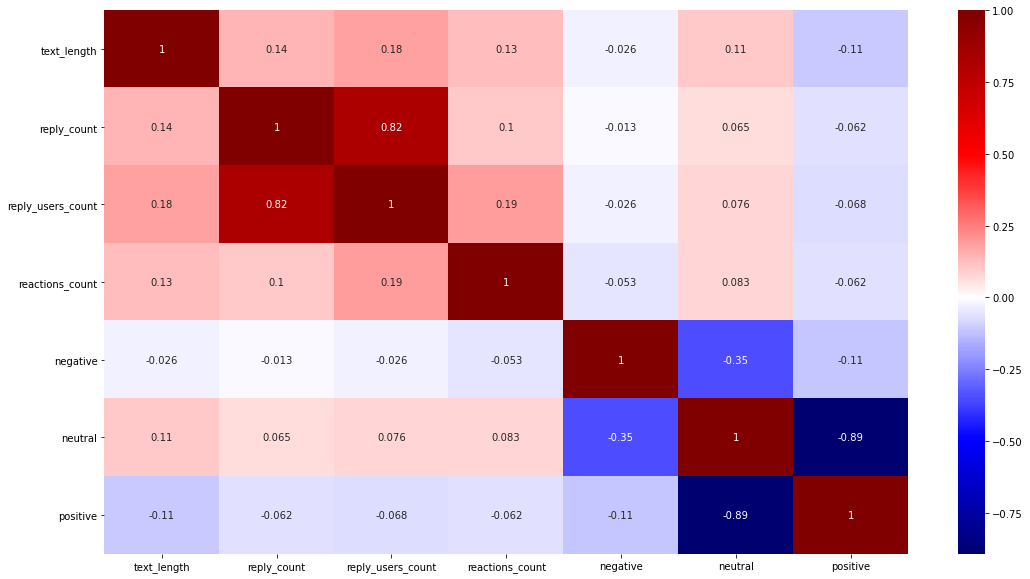

In [101]:
#correlation for numerial columns
corr_matrix = df_num.corr()
fig, ax = plt.subplots(figsize = (18, 10))
sns.heatmap(corr_matrix, cmap ='seismic', center = 0, annot=True);

In [102]:
#normalizer
import numpy as np
from sklearn.preprocessing import Normalizer
X = df_num

In [103]:
#check X
X.shape

(4940, 7)

In [104]:
# normalize and transform
transformer = Normalizer().fit(X)
x_normalized = transformer.transform(X)

In [105]:
# concat variables into X df
X = pd.DataFrame(x_normalized, columns=X.columns)

In [106]:
X_cols = X.columns

In [107]:
#check columns to copy into cat dataframe
df_cat.columns

Index(['channel_name', 'user', 'real_name', 'participant', 'text',
       'replies_true', 'day_name', 'day_type', 'time', 'dayparts', 'month',
       'reactions_name', 'link_of_file', 'files_true', 'github_links',
       'attachments_true', 'reaction_true'],
      dtype='object')

In [108]:
#encoding categorical features
cat = pd.get_dummies(df_cat, columns=['files_true', 'replies_true', 'attachments_true', 
                                      'reaction_true', 'dayparts', 
                                      'channel_name', 'month', 'participant'], drop_first = True)

In [109]:
# drop customer_number column
cat.drop(['real_name', 'text','day_type', 'user', 'day_name', 'reactions_name',
          'time', 'link_of_file', 'github_links'], axis=1, inplace=True)

In [110]:
#test cat df
cat

,files_true_True,replies_true_True,attachments_true_True,reaction_true_True,dayparts_Early Morning,dayparts_Evening,dayparts_Late Night,dayparts_Morning,dayparts_Night,channel_name_dmemes,...,channel_name_funcommittee,channel_name_general,channel_name_katas,channel_name_labhelp,channel_name_music,channel_name_random,channel_name_vanilla,month_March,month_May,participant_teacher
0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4935,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4936,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4937,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4938,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1


In [111]:
# dropping the reaction_true column as that's what we wanna predict
cat_clean = cat.drop(['replies_true_True'], axis=1)

In [112]:
# defining the target y
y = cat['replies_true_True']

In [113]:
#checking the len of x_normalized & cat_clean before merginf back together in X
len(x_normalized), len(y), len(df)

(4940, 4940, 4940)

In [114]:
# bring the numerical data (scaled)in with the categorical
X = np.concatenate((x_normalized, cat_clean),axis=1)

In [115]:
#test
X

array([[0.99959209, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.99997001, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.99298702, 0.11794099, 0.0076091 , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.99970269, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.99950654, 0.        , 0.        , ..., 0.        , 1.        ,
        1.        ],
       [0.99999532, 0.00184501, 0.00184501, ..., 0.        , 0.        ,
        0.        ]])

In [116]:
#import model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [117]:
#train test split - splitting X and y each into 2 data sets(train data and test data)
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size= 0.4, random_state=40)

In [118]:
#model development
#create a Logistic Regression classifier (classification) object using LogisticRegression() function
#fit model on the train set using fit()

classification = LogisticRegression(random_state=0, solver='lbfgs',max_iter=400,
                  multi_class='ovr').fit(X_train, y_train)

In [119]:
#perform prediction on the test set using predict()
from sklearn.metrics import accuracy_score 
predictions = classification.predict(X_test)

In [120]:
#check the predictions array
predictions

array([1, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [121]:
#calculating the accuracy score
accuracy_score(y_test, predictions)

0.8932186234817814

In [122]:
#defining the confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions)
cnf_matrix

array([[1724,    0],
       [ 211,   41]])

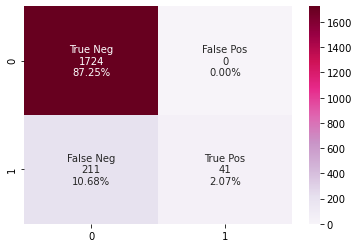

In [123]:
#visualizing the confusion matrix
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cnf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='PuRd');

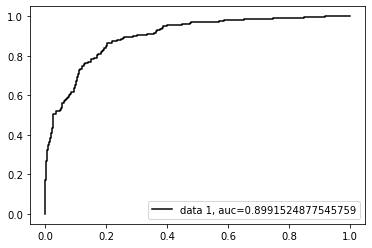

In [124]:
#visualising the ROC and AUC
y_pred_proba = classification.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc), color='k')
plt.legend(loc=4)
plt.show()

### Linear Regression for Replies

In [128]:
#import the model
from sklearn import linear_model
#import evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score

In [129]:
df_num

,text_length,reply_count,reply_users_count,reactions_count,negative,neutral,positive
0,35,0,0,0,0.000,1.000,0.000
1,98,0,0,0,0.000,0.695,0.305
2,261,31,2,0,0.153,0.760,0.086
3,76,0,0,0,0.000,1.000,0.000
4,7,0,0,0,0.000,1.000,0.000
...,...,...,...,...,...,...,...
4935,21,0,0,0,0.000,0.471,0.529
4936,82,0,0,0,0.000,1.000,0.000
4937,41,0,0,0,0.000,1.000,0.000
4938,45,0,0,1,0.000,1.000,0.000


In [130]:
#first, we define the y or dependent variable we are seeking to predict (our label)
y = df_num['reply_count']
#then we drop that column from the list of remaining columns (features) that we will feed into our model 
X = df_num.drop(['reply_count'], axis=1)
#we define the model we will use - in this case LR
lm = linear_model.LinearRegression()

In [131]:
#next, is the simple bit - all we do is fit the model to our data 
model = lm.fit(X,y)
#then we can calculate a score 
lm.score(X,y)

0.6773662244236817

In [132]:
#Now we have our first imperfect iteration or It1 

predictions  = lm.predict(X)

In [133]:
r2_score(y, predictions)

0.6773662244236817

In [134]:
lm.intercept_

76.86085547185293

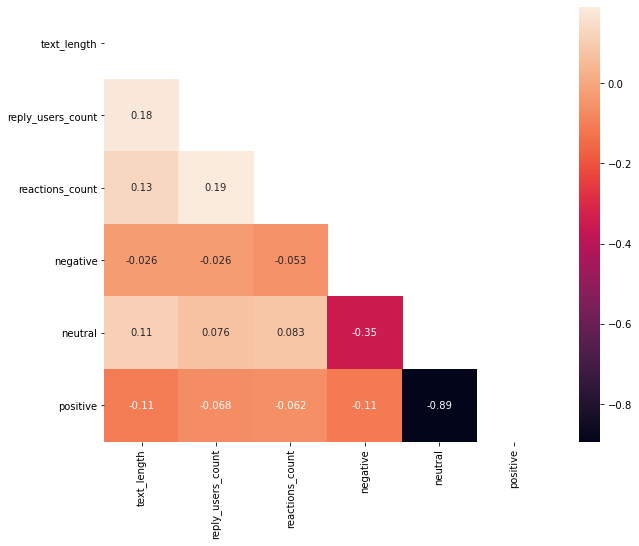

In [135]:
correlations_matrix = X.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

/Users/lilmac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


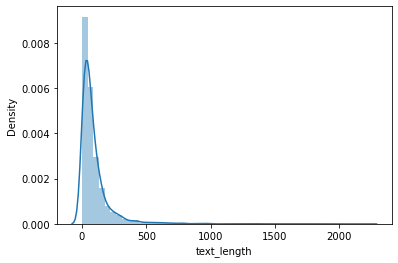

In [136]:
sns.distplot(df_num['text_length'])
plt.show()

<AxesSubplot:xlabel='text_length'>

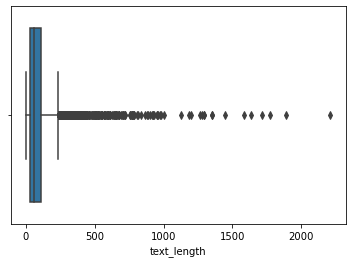

In [137]:
sns.boxplot(x=df_num['text_length'])

In [138]:
#remove outliers using calculated IQRs 

iqr = np.percentile(df_num['text_length'],75) - np.percentile(df_num['text_length'],25)
upper_limit = np.percentile(df_num['text_length'],75) + 1.5*iqr
lower_limit = np.percentile(df_num['text_length'],25) - 1.5*iqr

df_num_removeoutliers = df_num[(df_num['text_length']>lower_limit) & (df_num['text_length']<upper_limit)]

/Users/lilmac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


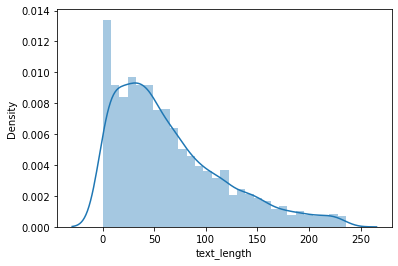

In [139]:
sns.distplot(df_num_removeoutliers['text_length'])
plt.show()

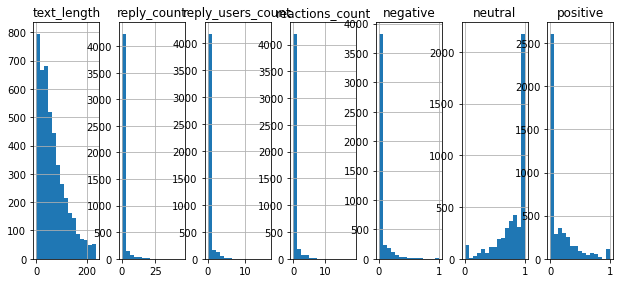

In [140]:
#all histograms 
df_num_removeoutliers.hist(bins=15, figsize=(15, 10), layout=(2, 10));

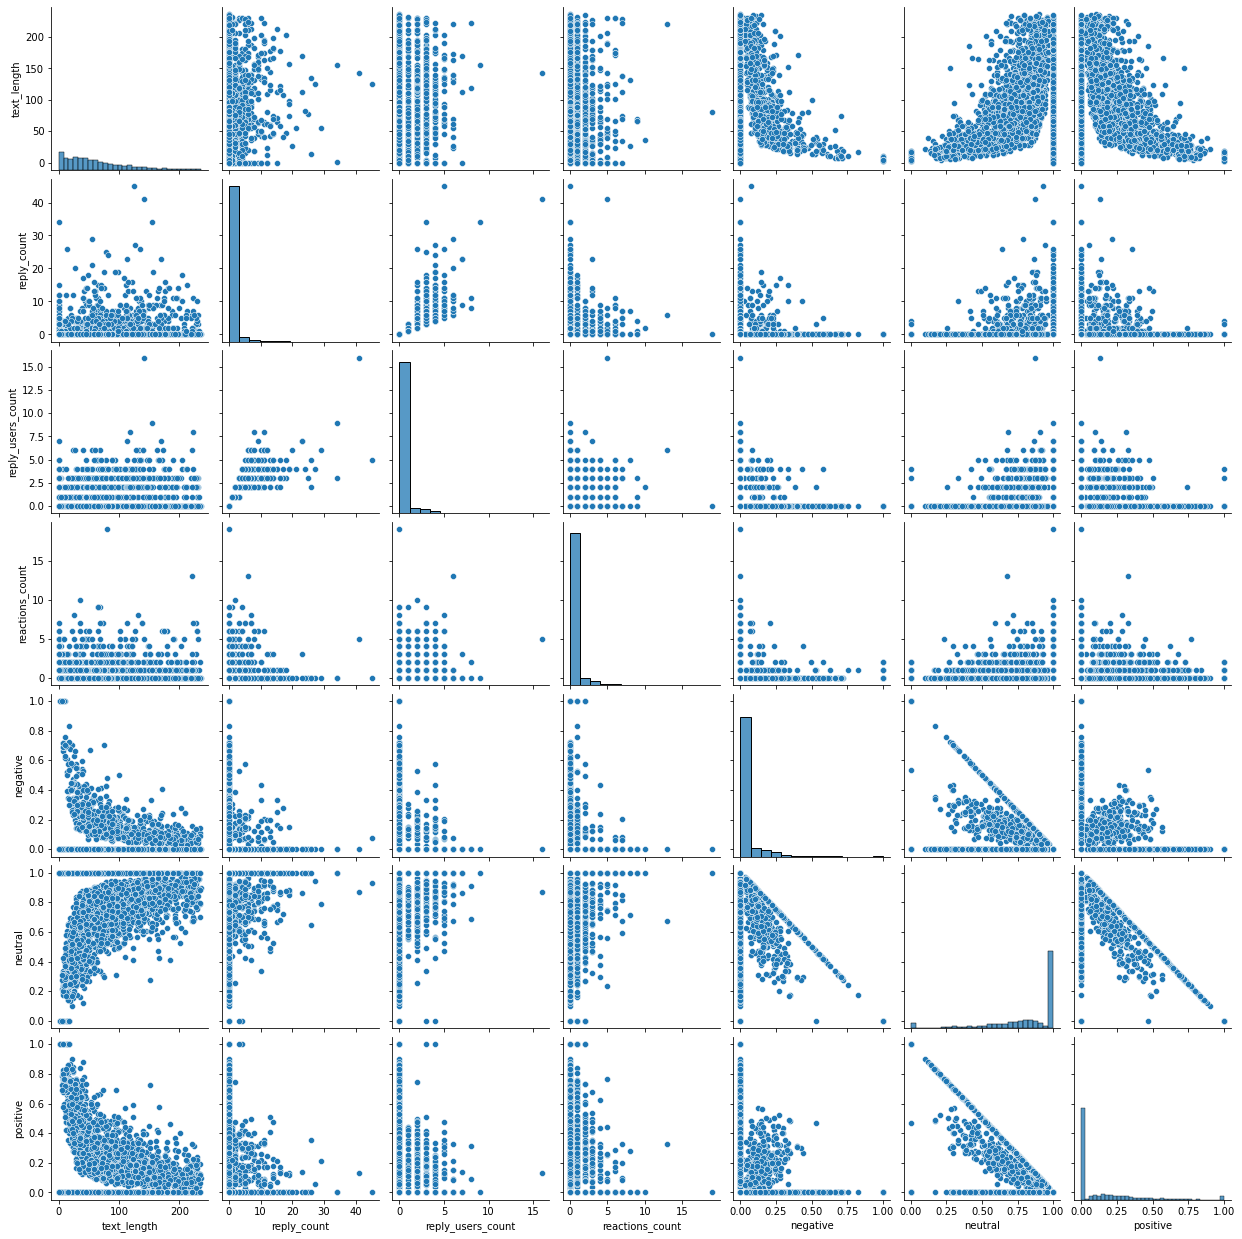

In [141]:
# all scatter plots as a matrix
sns.pairplot(df_num_removeoutliers)

In [142]:
df_num.shape

(4940, 7)

In [143]:
X_cat = cat

In [144]:
#option 1 using OHE 
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(X_cat)
encoded = encoder.transform(X_cat).toarray()
encoded.shape

(4940, 24)

In [145]:
#option 2 standardising all numeric features / rescaling using Standard Scaler
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(X)
x_standardized = transformer.transform(X)
print(x_standardized.shape)

(4940, 6)


In [146]:
#step 6 bring the X data back together 
X = np.concatenate((x_standardized, encoded), axis=1)
# we did this already : y = data['TARGET_D']

In [147]:
X_cat.shape
#check the shape of the array

(4940, 24)

In [148]:
y.shape
#check the shape of the array - both X and y should have the same no of rows 

(4940,)

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [150]:
#step 7 split the data into train and test randomly, as a %
from sklearn.model_selection import train_test_split

In [151]:
#step 8 apply the machine learn model for It3 
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
r2_score(y_test, predictions)

0.6600907166035096

In [152]:
mse = mean_squared_error(y_test, predictions)
print(mse)

2.853221599037178


In [153]:
import math 
rmse = math.sqrt(mse)
print(rmse)

1.6891481874119803


In [154]:
r2 = r2_score(y_test, predictions)
r2

0.6600907166035096

### Random Forest for Replies

In [155]:
df_num.head()

,text_length,reply_count,reply_users_count,reactions_count,negative,neutral,positive
0,35,0,0,0,0.000,1.000,0.000
1,98,0,0,0,0.000,0.695,0.305
2,261,31,2,0,0.153,0.760,0.086
3,76,0,0,0,0.000,1.000,0.000
4,7,0,0,0,0.000,1.000,0.000


In [156]:
cat.head()

,files_true_True,replies_true_True,attachments_true_True,reaction_true_True,dayparts_Early Morning,dayparts_Evening,dayparts_Late Night,dayparts_Morning,dayparts_Night,channel_name_dmemes,...,channel_name_funcommittee,channel_name_general,channel_name_katas,channel_name_labhelp,channel_name_music,channel_name_random,channel_name_vanilla,month_March,month_May,participant_teacher
0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [157]:
# bring the numerical data (scaled)in with the categorical
random_df = pd.concat([df_num, cat], axis=1, join="inner")
random_df

,text_length,reply_count,reply_users_count,reactions_count,negative,neutral,positive,files_true_True,replies_true_True,attachments_true_True,...,channel_name_funcommittee,channel_name_general,channel_name_katas,channel_name_labhelp,channel_name_music,channel_name_random,channel_name_vanilla,month_March,month_May,participant_teacher
0,35,0,0,0,0.000,1.000,0.000,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,98,0,0,0,0.000,0.695,0.305,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,261,31,2,0,0.153,0.760,0.086,0,1,0,...,0,1,0,0,0,0,0,0,1,0
3,76,0,0,0,0.000,1.000,0.000,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,7,0,0,0,0.000,1.000,0.000,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4935,21,0,0,0,0.000,0.471,0.529,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4936,82,0,0,0,0.000,1.000,0.000,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4937,41,0,0,0,0.000,1.000,0.000,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4938,45,0,0,1,0.000,1.000,0.000,0,0,0,...,0,0,0,0,0,0,1,0,1,1


In [168]:
random_df.columns

Index(['text_length', 'reply_count', 'reply_users_count', 'reactions_count',
       'negative', 'neutral', 'positive', 'files_true_True',
       'replies_true_True', 'attachments_true_True', 'reaction_true_True',
       'dayparts_Early Morning', 'dayparts_Evening', 'dayparts_Late Night',
       'dayparts_Morning', 'dayparts_Night', 'channel_name_dmemes',
       'channel_name_dresource', 'channel_name_dvizbeauties',
       'channel_name_finalproject', 'channel_name_frustrations',
       'channel_name_funcommittee', 'channel_name_general',
       'channel_name_katas', 'channel_name_labhelp', 'channel_name_music',
       'channel_name_random', 'channel_name_vanilla', 'month_March',
       'month_May', 'participant_teacher'],
      dtype='object')

In [165]:
# defining target variables
X= random_df.drop(['reply_count', 'reply_users_count', 'replies_true_True'], axis=1)
y= random_df.reply_count

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [159]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [160]:
# import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.863697705802969


In [161]:
from sklearn.ensemble import RandomForestClassifier

# create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

# train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [166]:
from sklearn.ensemble import RandomForestClassifier

# define feature names
feature_names = [f'feature {i}' for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

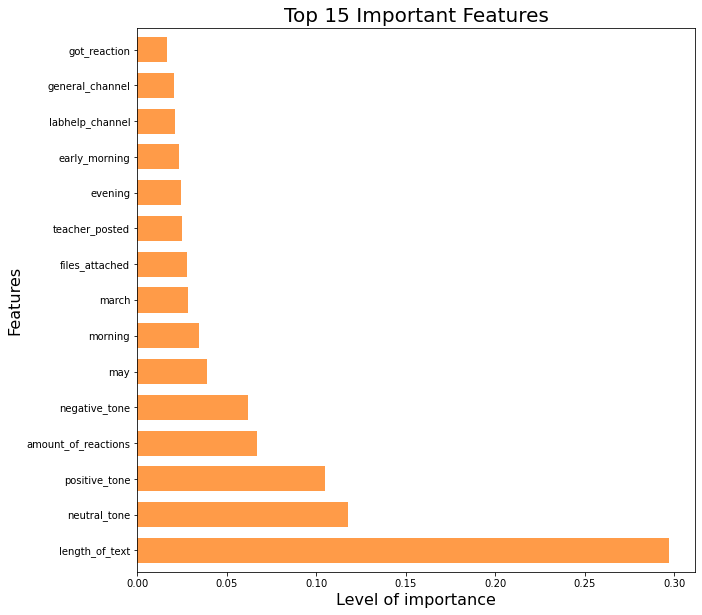

In [221]:
# feature importance
feat_importances = pd.Series(importances, index=X.columns)
plt.figure(figsize=(10,10))
feat_importances.nlargest(15).plot(kind='barh', color='#FF9B48', width= 0.7)
plt.xlabel('Level of importance', fontsize=16)
plt.ylabel('Features', fontsize=16)
plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], ['length_of_text', 'neutral_tone', 'positive_tone',
                                                   'amount_of_reactions', 'negative_tone',
                                                   'may', 'morning','march', 'files_attached', 
                                                   'teacher_posted', 'evening', 'early_morning',
                                                   'labhelp_channel', 'general_channel', 'got_reaction'])

plt.title("Top 15 Important Features", fontsize=20)
plt.show()